In [1]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore') 



In [2]:
# Function to split the dataset
def split_dataset(original_dir, base_dir, train_size=0.7, val_size=0.15, test_size=0.15):
    classes = [str(i) for i in range(10)] + [chr(i) for i in range(97, 123)]  # '0-9' + 'a-z'
    
    # Create directories for train, validation, and test sets
    for split in ['train', 'val', 'test']:
        split_dir = os.path.join(base_dir, split)
        if not os.path.exists(split_dir):
            os.makedirs(split_dir)
            for class_name in classes:
                os.makedirs(os.path.join(split_dir, class_name))

    # Split the dataset
    for class_name in classes:
        class_dir = os.path.join(original_dir, class_name)
        images = os.listdir(class_dir)
        random.shuffle(images)
        
        train_idx = int(len(images) * train_size)
        val_idx = int(len(images) * (train_size + val_size))

        train_images = images[:train_idx]
        val_images = images[train_idx:val_idx]
        test_images = images[val_idx:]

        # Copy the images to respective directories
        for image in train_images:
            shutil.copy(os.path.join(class_dir, image), os.path.join(base_dir, 'train', class_name, image))
        for image in val_images:
            shutil.copy(os.path.join(class_dir, image), os.path.join(base_dir, 'val', class_name, image))
        for image in test_images:
            shutil.copy(os.path.join(class_dir, image), os.path.join(base_dir, 'test', class_name, image))

# Paths
original_data_dir = 'C:/Users/sab00/OneDrive/Documents/AB/ML/project/data'  # Original dataset containing folders '0-9' and 'a-z'
base_data_dir = 'C:/Users/sab00/OneDrive/Documents/AB/ML/project/data_split'  # Folder where train/val/test folders will be created

# Split the dataset into train, val, and test (70%, 15%, 15%)
split_dataset(original_data_dir, base_data_dir)

# Updated paths after splitting
train_dir = os.path.join(base_data_dir, 'train')
val_dir = os.path.join(base_data_dir, 'val')
test_dir = os.path.join(base_data_dir, 'test')

# Image data generators


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(64, 64), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(64, 64), batch_size=32, class_mode='categorical', shuffle=False)

# CNN model with Input layer to remove the warning
model = Sequential([
    Input(shape=(64, 64, 3)),  # Use Input layer for the input shape
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(36, activation='softmax')  # 36 classes (0-9 and a-z)
])

model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
def predict_on_validation_set(val_generator):
    Y_val_pred = model.predict(val_generator)
    return Y_val_pred


Found 1760 images belonging to 36 classes.
Found 360 images belonging to 36 classes.
Found 395 images belonging to 36 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 687,844 (2.62 MB)

 Trainable params: 687,844 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history_no_aug = model.fit(train_generator, epochs=15, validation_data=val_generator)

val_loss, val_acc= model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc}")

# Classification report and confusion matrix on the validation set
Y_val_pred = predict_on_validation_set(val_generator)
y_val_pred = tf.argmax(Y_val_pred, axis=1)
print('Confusion Matrix (Validation Set)')
print(confusion_matrix(val_generator.classes, y_val_pred))
print('Classification Report (Validation Set)')
target_names = [str(i) for i in range(10)] + [chr(i) for i in range(97, 123)]  # 36 classes (0-9, a-z)
print(classification_report(val_generator.classes, y_val_pred, target_names=target_names))

Epoch 1/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 350ms/step - accuracy: 0.0300 - loss: 3.5894 - val_accuracy: 0.0278 - val_loss: 3.5172
Epoch 2/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.0528 - loss: 3.4949 - val_accuracy: 0.2111 - val_loss: 2.9226
Epoch 3/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.1117 - loss: 3.1555 - val_accuracy: 0.3278 - val_loss: 2.4166
Epoch 4/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.1709 - loss: 2.8070 - val_accuracy: 0.4222 - val_loss: 1.9406
Epoch 5/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.2047 - loss: 2.6177 - val_accuracy: 0.5222 - val_loss: 1.5992
Epoch 6/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.2392 - loss: 2.4477 - val_accuracy: 0.5528 - val_loss: 1.4319
Epoch 7/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.2795 - loss: 2.2907 - val_accuracy: 0.6306 - val_loss: 1.2506
Epoch 8/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.3361 - loss: 2.0627 - val_accuracy: 0.6611 

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32, class_mode='categorical')
history_aug = model.fit(train_generator, epochs=15, validation_data=val_generator)

val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc}")

# Classification report and confusion matrix on the validation set
Y_val_pred = predict_on_validation_set(val_generator)
y_val_pred = tf.argmax(Y_val_pred, axis=1)
print('Confusion Matrix (Validation Set)')
print(confusion_matrix(val_generator.classes, y_val_pred))
print('Classification Report (Validation Set)')
target_names = [str(i) for i in range(10)] + [chr(i) for i in range(97, 123)]  # 36 classes (0-9, a-z)
print(classification_report(val_generator.classes, y_val_pred, target_names=target_names))

Found 1760 images belonging to 36 classes.
Epoch 1/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.4124 - loss: 1.7516 - val_accuracy: 0.7778 - val_loss: 0.7372
Epoch 2/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.4123 - loss: 1.6238 - val_accuracy: 0.7472 - val_loss: 0.7304
Epoch 3/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.4532 - loss: 1.6199 - val_accuracy: 0.7806 - val_loss: 0.6921
Epoch 4/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.4628 - loss: 1.5451 - val_accuracy: 0.7861 - val_loss: 0.6875
Epoch 5/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.5018 - loss: 1.4696 - val_accuracy: 0.6889 - val_loss: 0.8251
Epoch 6/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.4665 - loss: 1.5207 - val_accuracy: 0.7750 - val_loss: 0.6841
Epoch 7/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.4898 - loss: 1.4858 - val_accuracy: 0.7806 - val_loss: 0.6558
Epoch 8/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0

In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Image data generators with augmentation for training
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)


val_datagen = ImageDataGenerator(rescale=1./255)

# Directories for the dataset
train_dir = 'C:/Users/sab00/OneDrive/Documents/AB/ML/project/data_split/train'
val_dir = 'C:/Users/sab00/OneDrive/Documents/AB/ML/project/data_split/val'

# Flow from directory for train and validation sets
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(64, 64), batch_size=32, class_mode='categorical')

# Load the VGG16 model pre-trained on ImageNet, excluding the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the convolutional base of VGG16
for layer in base_model.layers:
    layer.trainable = False

# Create the new model on top of the pre-trained base
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(36, activation='softmax')  # 36 classes (0-9, a-z)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
# Train the model
history_vgg = model.fit(train_generator, epochs=15, validation_data=val_generator)

# Evaluate on validation set
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc}")

# Generate predictions on validation set
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion matrix and classification report for the validation set
print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))

target_names = [str(i) for i in range(10)] + [chr(i) for i in range(97, 123)]  # 0-9 and a-z
print('Classification Report')
print(classification_report(val_generator.classes, y_pred, target_names=target_names))


Found 1760 images belonging to 36 classes.
Found 360 images belonging to 36 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 2, 2, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,248,484 (58.17 MB)

 Trainable params: 533,796 (2.04 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 26s 429ms/step - accuracy: 0.0759 - loss: 3.5826 - val_accuracy: 0.4889 - val_loss: 2.3426
Epoch 2/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 399ms/step - accuracy: 0.2638 - loss: 2.5850 - val_accuracy: 0.6306 - val_loss: 1.6711
Epoch 3/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 395ms/step - accuracy: 0.4029 - loss: 2.0646 - val_accuracy: 0.6833 - val_loss: 1.2862
Epoch 4/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 387ms/step - accuracy: 0.4510 - loss: 1.8030 - val_accuracy: 0.7194 - val_loss: 1.0513
Epoch 5/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 376ms/step - accuracy: 0.4873 - loss: 1.5607 - val_accuracy: 0.7306 - val_loss: 0.9581
Epoch 6/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 410ms/step - accuracy: 0.5628 - loss: 1.3955 - val_accuracy: 0.7194 - val_loss: 0.8961
Epoch 7/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 381ms/step - accuracy: 0.5884 - loss: 1.2898 - val_accuracy: 0.7806 - val_loss: 0.8084
Epoch 8/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 397ms/step - accuracy: 0.6121 - loss: 1.2083 - val_accu

In [7]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Image data generators with augmentation for training
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

# Directories for the dataset
train_dir = 'C:/Users/sab00/OneDrive/Documents/AB/ML/project/data_split/train'
val_dir = 'C:/Users/sab00/OneDrive/Documents/AB/ML/project/data_split/val'

# Flow from directory for train and validation sets
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(75, 75), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(75, 75), batch_size=32, class_mode='categorical')

# Load the InceptionV3 model pre-trained on ImageNet, excluding the top classification layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

# Freeze the convolutional base of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Create the new model on top of the pre-trained base
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(36, activation='softmax')  # 36 classes (0-9, a-z)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
# Train the model
history_incp = model.fit(train_generator, epochs=15, validation_data=val_generator)

# Evaluate on validation set
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc}")

# Generate predictions on validation set
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion matrix and classification report for the validation set
print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))

target_names = [str(i) for i in range(10)] + [chr(i) for i in range(97, 123)]  # 0-9 and a-z
print('Classification Report')
print(classification_report(val_generator.classes, y_pred, target_names=target_names))


Found 1760 images belonging to 36 classes.
Found 360 images belonging to 36 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 1, 1, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,336,580 (85.21 MB)

 Trainable params: 533,796 (2.04 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - accuracy: 0.0954 - loss: 3.7730 - val_accuracy: 0.4861 - val_loss: 2.0100
Epoch 2/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - accuracy: 0.2745 - loss: 2.5603 - val_accuracy: 0.6000 - val_loss: 1.5345
Epoch 3/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - accuracy: 0.3578 - loss: 2.1602 - val_accuracy: 0.6194 - val_loss: 1.2615
Epoch 4/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - accuracy: 0.4157 - loss: 1.9445 - val_accuracy: 0.6250 - val_loss: 1.1949
Epoch 5/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - accuracy: 0.4700 - loss: 1.7532 - val_accuracy: 0.6472 - val_loss: 1.1344
Epoch 6/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 280ms/step - accuracy: 0.4561 - loss: 1.6743 - val_accuracy: 0.6889 - val_loss: 1.0541
Epoch 7/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 18s 314ms/step - accuracy: 0.5340 - loss: 1.5503 - val_accuracy: 0.7194 - val_loss: 0.9336
Epoch 8/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 17s 311ms/step - accuracy: 0.5138 - loss: 1.5305 - val_accuracy

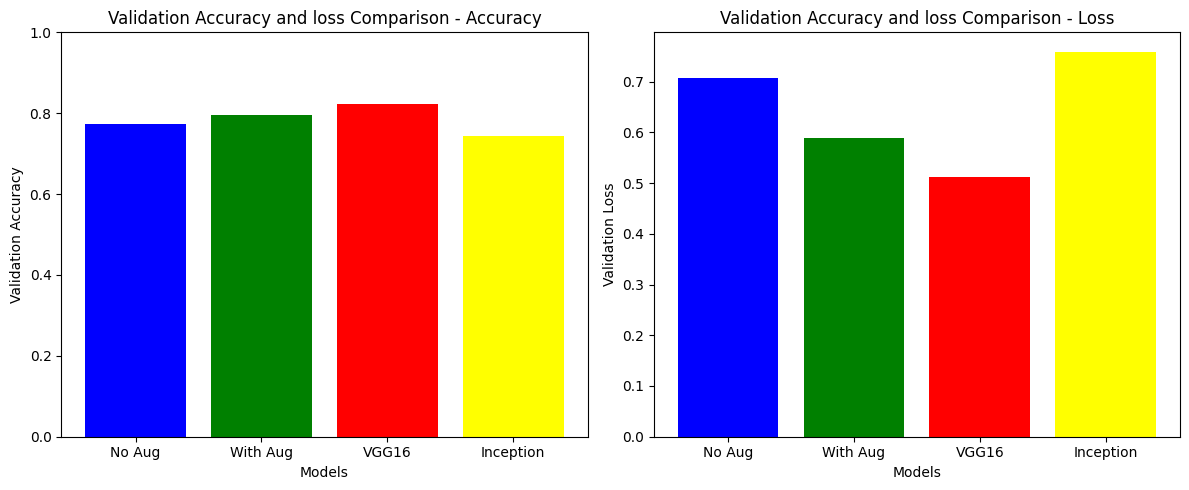

In [8]:
import matplotlib.pyplot as plt
def plot_evaluation_results(models, accuracies, losses, title):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot for accuracy
    ax[0].bar(models, accuracies, color=['blue', 'green', 'red','yellow'])
    ax[0].set_title(f'{title} - Accuracy')
    ax[0].set_xlabel('Models')
    ax[0].set_ylabel('Validation Accuracy')
    ax[0].set_ylim([0, 1])
    
    # Plot for loss
    ax[1].bar(models, losses, color=['blue', 'green', 'red','yellow'])
    ax[1].set_title(f'{title} - Loss')
    ax[1].set_xlabel('Models')
    ax[1].set_ylabel('Validation Loss')
    
    plt.tight_layout()
    plt.show()
# Plot test accuracies for each model
models = ['No Aug', 'With Aug', 'VGG16','Inception']
accuracies = [
    history_no_aug.history['val_accuracy'][-1],  # Use the last epoch accuracy
    history_aug.history['val_accuracy'][-1], 
    history_vgg.history['val_accuracy'][-1], 
    history_incp.history['val_accuracy'][-1]
]

losses = [
    history_no_aug.history['val_loss'][-1],  # Use the last epoch loss
    history_aug.history['val_loss'][-1], 
    history_vgg.history['val_loss'][-1], 
    history_incp.history['val_loss'][-1]
]

plot_evaluation_results(models, accuracies,losses, 'Validation Accuracy and loss Comparison')

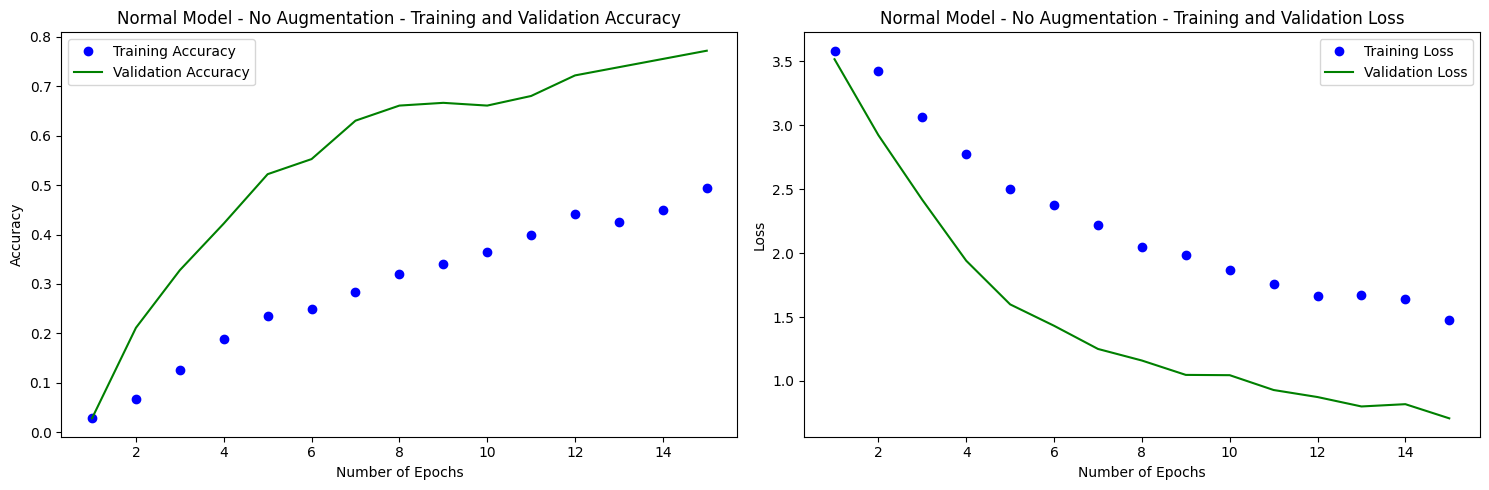

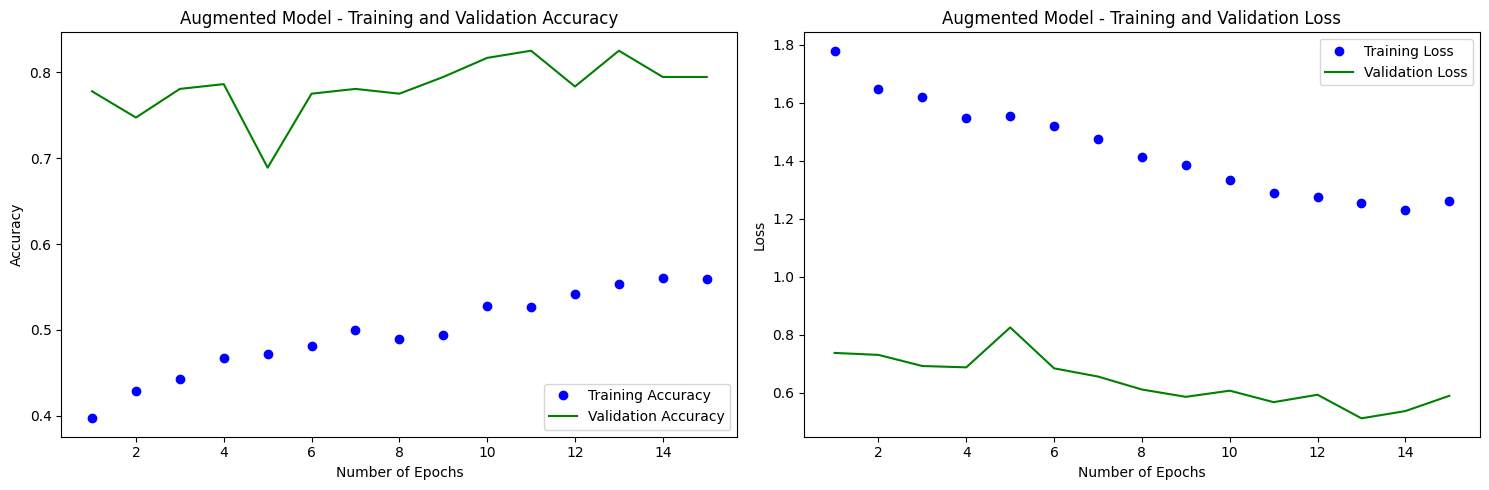

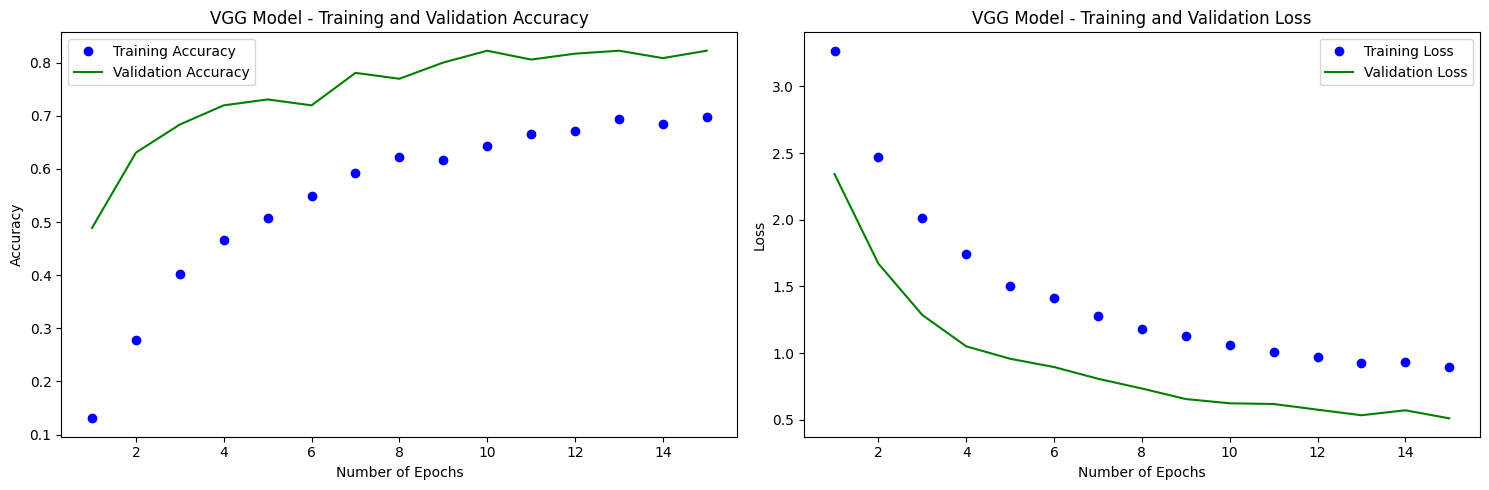

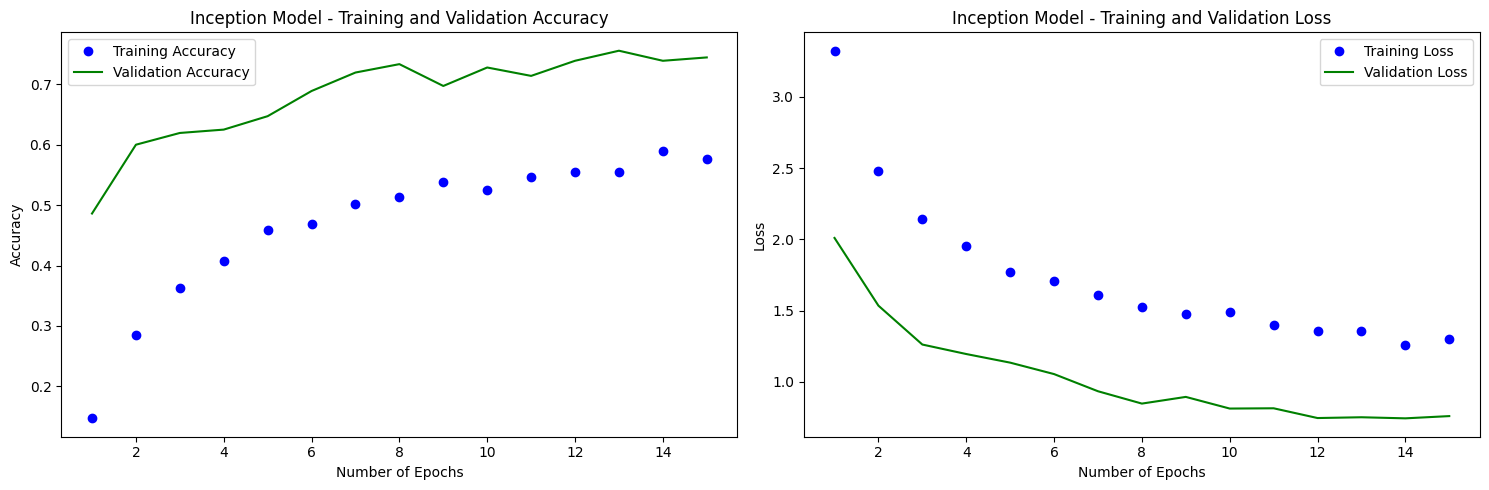

In [17]:
import matplotlib.pyplot as plt

def plot_graph(history, title="Model"):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    num_epochs = range(1, len(accuracy) + 1)

    plt.figure(figsize=(15, 5))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(num_epochs, accuracy, 'bo', label='Training Accuracy')
    plt.plot(num_epochs, val_accuracy, 'g', label='Validation Accuracy')
    plt.title(f"{title} - Training and Validation Accuracy")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(num_epochs, loss, 'bo', label='Training Loss')
    plt.plot(num_epochs, val_loss, 'g', label='Validation Loss')
    plt.title(f"{title} - Training and Validation Loss")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function with the correct history objects
plot_graph(history_no_aug, title="Normal Model - No Augmentation")
plot_graph(history_aug, title="Augmented Model")
plot_graph(history_vgg, title="VGG Model")
plot_graph(history_incp, title="Inception Model")
